In [1]:
import numpy as n
import pandas as p
import matplotlib.pyplot as plt

In [2]:
crimeAw= p.read_csv(r"C:\Users\admin\Downloads\archive\CrimesOnWomenData.csv")
crimeAw.drop(['Unnamed: 0'], axis=1, inplace=True)
crimeAw

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...
731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,Delhi UT,2021,2,1,0,5,1,9,0
734,Lakshadweep,2021,0,0,0,1,1,3,0


In [3]:
crimeAw.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [4]:
crimeAw.tail()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,Delhi UT,2021,2,1,0,5,1,9,0
734,Lakshadweep,2021,0,0,0,1,1,3,0
735,Puducherry,2021,2,0,2,31,3,12,0


In [5]:
crimeD = crimeAw.drop('Year',axis=1).describe().transpose()
crimeD

,count,mean,std,min,25%,50%,75%,max
Rape,736.0,727.855978,977.024945,0.0,35.00,348.5,1069.00,6337.0
K&A,736.0,1134.542120,1993.536828,0.0,24.75,290.0,1216.00,15381.0
DD,736.0,215.692935,424.927334,0.0,1.00,29.0,259.00,2524.0
AoW,736.0,1579.115489,2463.962518,0.0,34.00,387.5,2122.25,14853.0
AoM,736.0,332.722826,806.024551,0.0,3.00,31.0,277.50,9422.0
DV,736.0,2595.078804,4042.004953,0.0,13.00,678.5,3545.00,23278.0
WT,736.0,28.744565,79.999660,0.0,0.00,0.0,15.00,549.0


In [6]:
crimeAw.isnull().sum()

State    0
Year     0
Rape     0
K&A      0
DD       0
AoW      0
AoM      0
DV       0
WT       0
dtype: int64

In [7]:
crimeAw.duplicated().sum()

0

In [8]:
crimeAw.dtypes

State    object
Year      int64
Rape      int64
K&A       int64
DD        int64
AoW       int64
AoM       int64
DV        int64
WT        int64
dtype: object

In [17]:
crimeAw['State'].nunique()

70

In [41]:
crimeAw['State']=crimeAw['State'].str.upper()
crimeAw['State'].nunique()

37

In [43]:
crimeAw['State'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA',
       'D&N HAVELI', 'DELHI UT'], dtype=object)

In [45]:
crimeAw['State'] = crimeAw['State'].str.replace('D&N HAVELI', 'D & N HAVELI')
crimeAw['State'].nunique()

36

In [11]:
crime_distribution = crimeAw.drop(['State', 'Year'], axis=1).sum()
crime_distribution

Rape     535702
K&A      835023
DD       158750
AoW     1162229
AoM      244884
DV      1909978
WT        21156
dtype: int64

In [22]:
crimeAw['State'] = crimeAw['State'].str.replace('D&N HAVELI', 'D & N HAVELI')

In [12]:
correlation_matrix = crimeAw.drop(['State', 'Year'], axis=1).corr()
correlation_matrix

,Rape,K&A,DD,AoW,AoM,DV,WT
Rape,1.000000,0.700730,0.553497,0.804336,0.458025,0.680321,0.219218
K&A,0.700730,1.000000,0.691524,0.671159,0.355703,0.685999,0.179016
DD,0.553497,0.691524,1.000000,0.456012,0.422970,0.487465,0.093254
AoW,0.804336,0.671159,0.456012,1.000000,0.521432,0.631558,0.284338
AoM,0.458025,0.355703,0.422970,0.521432,1.000000,0.419300,0.260077
DV,0.680321,0.685999,0.487465,0.631558,0.419300,1.000000,0.280839
WT,0.219218,0.179016,0.093254,0.284338,0.260077,0.280839,1.000000


<Axes: xlabel='State'>

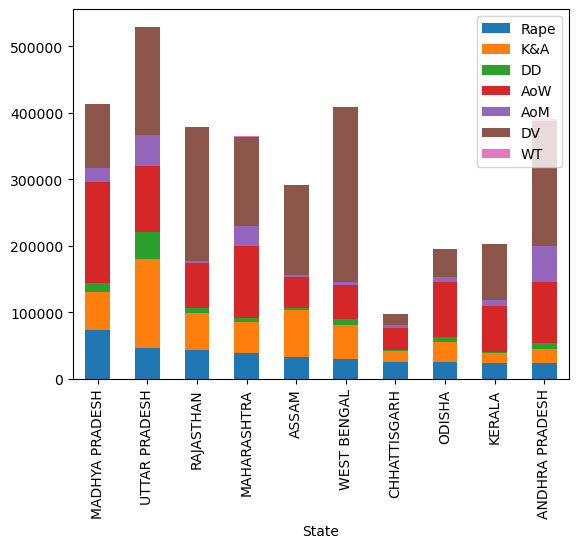

In [48]:
crimes= crimeAw.drop('Year',axis =1)
crimes.groupby('State').sum().sort_values('Rape',ascending=False).head(10).plot(kind='bar',stacked=True)


<Axes: xlabel='Year'>

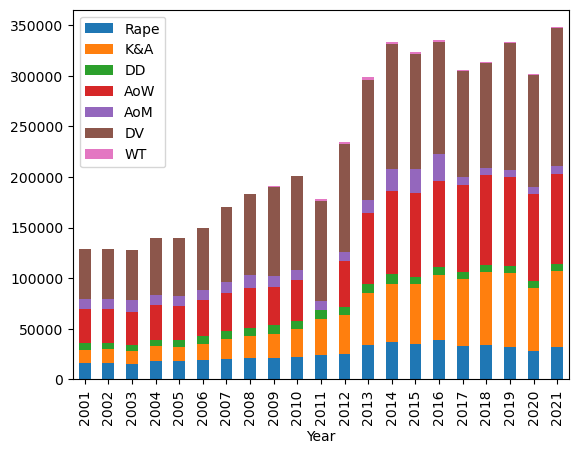

In [14]:
crimeAw.drop('State',axis=1).groupby('Year').sum().plot(kind='bar',stacked=True)

<Axes: >

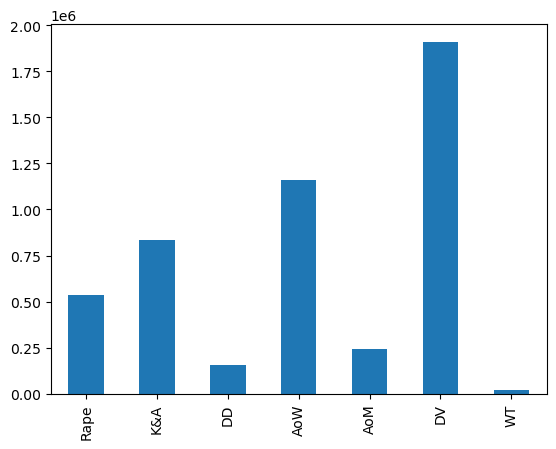

In [50]:
crimeDistribution = crimeAw.drop(['State','Year'],axis =1).sum()
crimeDistribution.plot(kind='bar')